# Analyze a new reward function over some existing laps

In [1]:
import sys
sys.path.append('../')

from deepracer.tracks import TrackIO

from reward import AWSReward
from utils.loader import get_df, load_sample_complete_laps,get_files_paths
from utils.transformer import df_to_params, get_episode
from utils.new_rewards import aggregate_episode_reward, summary, plot_new_reward
from analysis.apps import create_new_reward_app

track = TrackIO(base_path='../tracks').load_track("reinvent_base")

logs_base_path = '../logs/'
fname = 'training-simulation-logs-w7.log'
full_df= get_df( logs_base_path + fname)

Loaded 71 waypoints


## Define or load a new reward 

The function/object it should take a dictionary of params and return an object that can be casted to float

If you have a file with a function you can try to use the ``%%load`` magic to load it insted of copying it, just write ``%%load path/myfile.py`` in the first line of a cell an run it.

In [2]:
class NewReward(AWSReward):
    max_speed    = 1.0
    
    def _calculateReward(self):
        return self.distance_from_center 

In [3]:
aggregate_episode_reward?

Signature:
aggregate_episode_reward(
    df,
    reward_calculator,
    df_to_params,
    track,
    new_reward_name='new_reward',
)
Docstring:
!!! df should contain only one episode information
reward_calculator should be a callable that recieves a params dictionary and returns an object castable to float
df_to_params is a helper function that takes a series and transforms it into a dictionary of parameters
File:      ~/Code/deepracer/deepracer-analysis/utils/new_rewards.py
Type:      function


In [4]:
episode = 1
episode_df = aggregate_episode_reward(get_episode(full_df, episode), NewReward, df_to_params, track, 'new_reward')

You can get som meeningful summary of the episode

In [5]:
summary(episode_df,['new_reward'])

,,step,closest_waypoint_index,progress,speed,time,reward,duration,new_reward
iteration,episode,,,,,,,,
1,1,189,4,48.9639,0.629365,00:00:12,133.469,12.568453,15.510964


Or plot some columns 

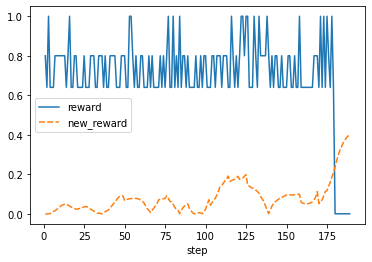

In [6]:
plot_new_reward(episode_df, ['reward','new_reward'])

Or interactivly go throw the logs and evaluate your new reward over existing laps/episodes 

In [7]:
create_new_reward_app(get_files_paths, logs_base_path, get_df, track, get_episode,  aggregate_episode_reward, NewReward, df_to_params)

You can analyze a reward function over multiple laps over [NewRewardOnCompleteLaps]( NewRewardOnCompleteLaps.ipynb )